In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('insurance.csv')
df.shape

(1338, 7)

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Data Analysis

(array([222., 140., 109., 128., 102., 137., 144., 114., 128., 114.]),
 array([18. , 22.6, 27.2, 31.8, 36.4, 41. , 45.6, 50.2, 54.8, 59.4, 64. ]),
 <BarContainer object of 10 artists>)

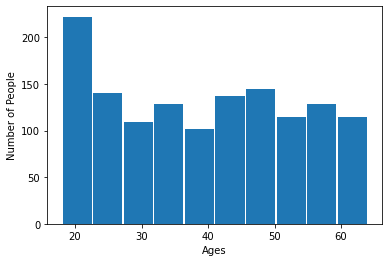

In [9]:
plt.xlabel('Ages')
plt.ylabel('Number of People')

plt.hist(df.age, rwidth=0.95)

In [10]:
import seaborn as sns

In [11]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

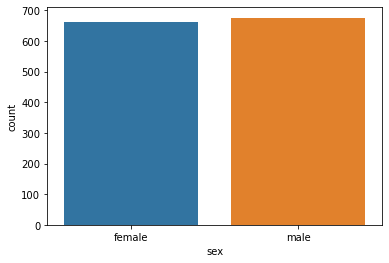

In [12]:
sns.countplot(x='sex', data=df)

In [14]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

<AxesSubplot:xlabel='children', ylabel='count'>

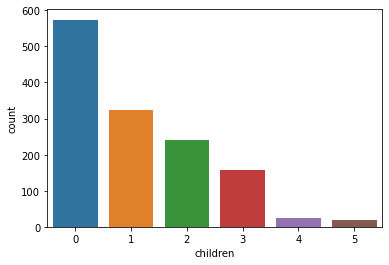

In [16]:
sns.countplot(x='children', data=df)

In [17]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

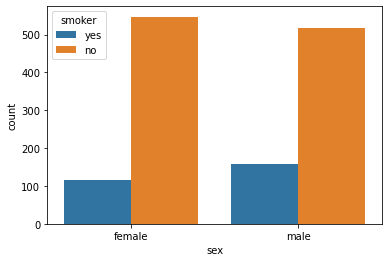

In [18]:
sns.countplot(x='sex', hue='smoker', data=df)

(array([ 30., 127., 234., 319., 288., 195.,  96.,  32.,  14.,   3.]),
 array([15.96 , 19.677, 23.394, 27.111, 30.828, 34.545, 38.262, 41.979,
        45.696, 49.413, 53.13 ]),
 <BarContainer object of 10 artists>)

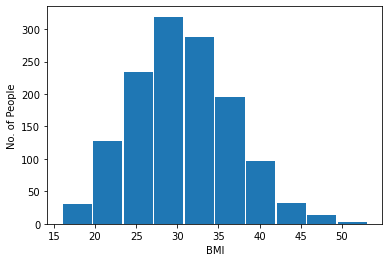

In [20]:
plt.xlabel('BMI')
plt.ylabel('No. of People')

plt.hist(df.bmi, rwidth=0.95)

<AxesSubplot:xlabel='smoker', ylabel='age'>

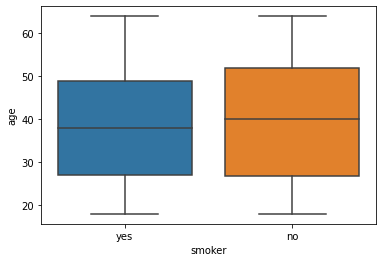

In [21]:
sns.boxplot(x='smoker', y='age', data=df)

In [25]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

#### Data Wrangling

In [23]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [26]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [28]:
gender = pd.get_dummies(df.sex, drop_first=True)
gender.head()

,male
0,0
1,1
2,1
3,1
4,1


In [29]:
smokers = pd.get_dummies(df.smoker, drop_first=True)
smokers.head()

,yes
0,1
1,0
2,0
3,0
4,0


In [31]:
df=pd.concat([df,gender,smokers], axis=1)
df.head(2)

,age,sex,bmi,children,smoker,region,charges,male,yes
0,19,female,27.90,0,yes,southwest,16884.9240,0,1
1,18,male,33.77,1,no,southeast,1725.5523,1,0


In [32]:
df.drop(['sex','smoker','region'], axis=1, inplace=True)

In [33]:
df.head(2)

,age,bmi,children,charges,male,yes
0,19,27.90,0,16884.9240,0,1
1,18,33.77,1,1725.5523,1,0


In [34]:
from sklearn import linear_model

In [35]:
x= df.drop('charges', axis=1)
y = df['charges']

In [36]:
model = linear_model.LinearRegression()
model.fit(x,y)

LinearRegression()

In [39]:
prediction = model.predict(x)
prediction.shape

(1338,)

In [40]:
model.predict([[20, 28, 2, 1,1]])

array([26772.01069164])